# Part II - (San Francisco FordGo Bikeshare Analysis)

## by (Victoria Dominion Robert)


## Investigation Overview

>The aim of this investigation is to enable the fordgo bikeshare business owners know where and how they should channel more of their marketing and advertisement strategies to by drawing insights from the following analysis;

<li>Which gender go on longer trips?</li>
<li>What gender has longer trip durations on weekdays?</li>
<li>What days of the week have the highest number of trips?</li>
<li>Which type of users go on longer trips?<li>
<li>What hours of the day have the highest number of trips?<li>
    


## Dataset Overview

> Bike sharing is a form of transportation that is easy to use, enjoyable and convenient. it involves a number of bikes parked at different locations where people can rent a bike by unlocking it with an app and returning after use to any bike station around the city. Unlocked bikes can be returned to any other station in the system, even if they were originally rented from a different station. People use bike sharing for many different reasons, such as commuting to work or school, running errands, and getting to and from appointments. 
There are about 183,412 records and 16 features in the bike share 2019 records dataset used for this project.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
#printing just the first five columns of the dataset
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [8]:
df = df.copy()
#1. The start_time and end_time column datatype should be changed to datetime datatype
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])


In [9]:
#2. The start_time column should be splitted into hour, day, month and year
df['start_month_name']=df['start_time'].dt.strftime('%B')
df['start_month']=df['start_time'].dt.month.astype(int)
df['start_week']=df['start_time'].dt.strftime('%a')
df['start_day']=df['start_time'].dt.day.astype(int)
df['start_hour']=df['start_time'].dt.hour


In [10]:
#3. The member_gender, user_type and the bike_share_for_all_trip datatype should be change to a categorical datatype
for col in ['member_gender', 'user_type', 'bike_share_for_all_trip']:
    df[col] = df[col].astype('category')


In [12]:
#4. The bike_id,start_station_id and the end_station_id should be changed to an object datatype
for col in ['bike_id', 'start_station_id', 'end_station_id']:
    df[col] = df[col].astype('object')
#5. Calculate the members age by their birth_year information provided
df['Age'] = 2019 - df['member_birth_year']

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1) 
What gender has longer trip durations on weekdays?


> The female gender seems to have longer trip durations on weekdays than the males. Even though the males cover longer durations on their trips than the females from previous analysis



In [6]:
#storing the days of the week in 'day_order'
day_order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

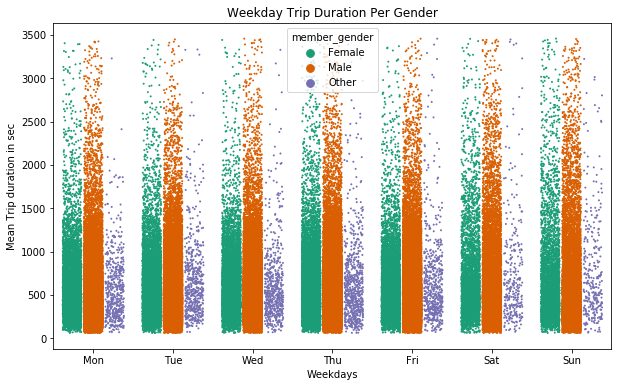

In [13]:
plt.figure(figsize=[10, 6])
sb.stripplot(data = df.query('duration_sec<duration_sec.quantile(0.99)'), x = 'start_week', y = 'duration_sec', hue = 'member_gender', order=day_order, palette = 'Dark2',
            size=2, jitter=0.35, dodge=True)
plt.title('Weekday Trip Duration Per Gender')
plt.ylabel('Mean Trip duration in sec')
plt.xlabel('Weekdays')
plt.show()

## (Visualization 2)
Which gender go on longer trips?

> From the duration versus gender plot, it is seen that the male gender covers more duration than the female gender and other gender types.

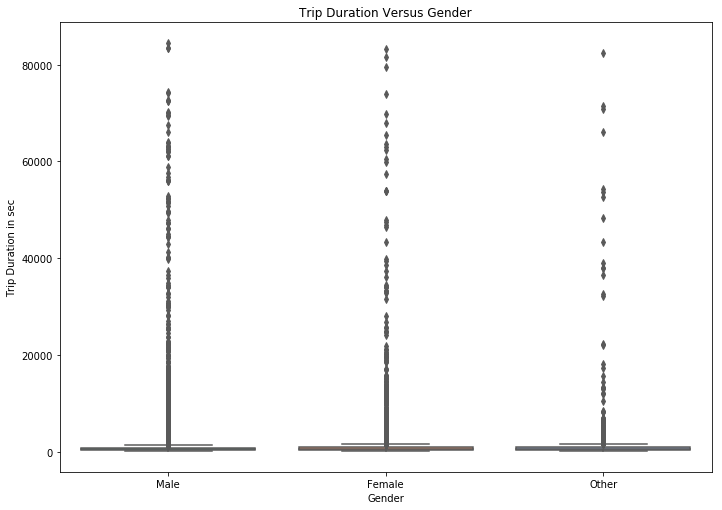

In [14]:
plt.figure(figsize = [11.69, 8.27])
sb.boxplot(x='member_gender', y='duration_sec', data = df, 
           order=['Male', 'Female', 'Other'],palette ='Set2')
plt.title('Trip Duration Versus Gender')
plt.xlabel('Gender')

plt.ylabel('Trip Duration in sec')
plt.show()

## (Visualization 3)
What days of the week have the highest number of trips?

>In the chart below, Thursday has the highest number of trips, followed by Tuesday, then wednesday. While saturday and sunday seems to have expected reduction on trips, since most people will likely be at home for weekends.



In [15]:
#A user-defined function to plot countplot
def countplot (df, column, order=None, color=None):
    plt.figure(figsize=[10,6])
    sb.countplot(data = df, x=column, color = color, order=order);
    plt.title(f'''Distribution of {column}'''.title(), fontsize=14, weight ='bold')
    plt.xlabel(column.title(),fontsize=10, weight='bold')
    plt.ylabel('Frequency'.title(),fontsize=10,weight='bold')

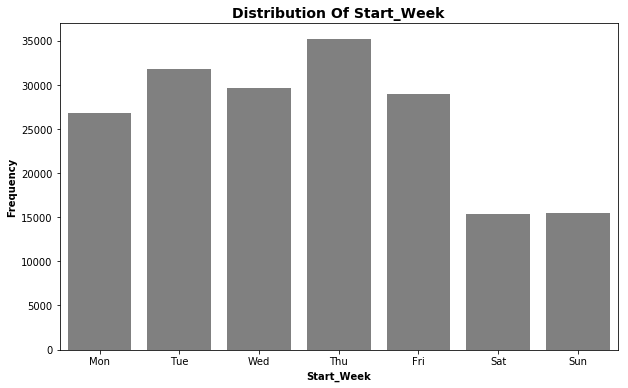

In [16]:
#calling plot function for the distribution of trips per week day
countplot(df,'start_week', color = 'grey', order=day_order)

## (Visualization 4)
Which type of users go on longer trips?

>The chart below shows that subscriber users are more than the customers.


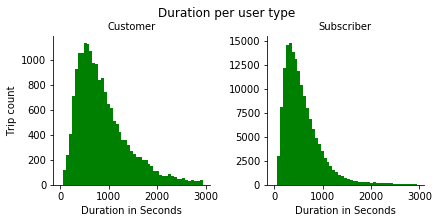

In [17]:
#Duration per user_type

duration_user = sb.FacetGrid(df, col="user_type", margin_titles=True,sharey = False)
binz = np.arange(0, 3000,60)
duration_user.map(plt.hist, "duration_sec",color="green", bins=binz)
duration_user.set_axis_labels("Duration in Seconds", "Trip count")
duration_user.set_titles(col_template = '{col_name}')
duration_user.fig.suptitle('Duration per user type', y=1.02);

## (Visualization 5)
What hours of the day have the highest number of trips?

>In the number of trips per hour chart below, it can be seen that the highest trips happens to be around 8 am in the morning and 5pm in the evening. I also observed that 3am in the morning has the lowest trip to occur probably because people are sleeping at that time.

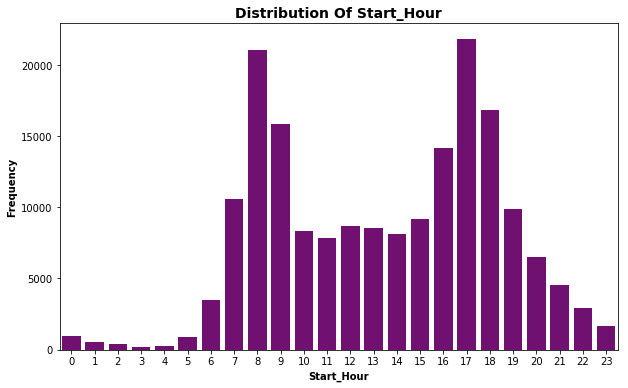

In [19]:
#calling plot function for distribution of trips per start_hour
countplot(df,'start_hour', color='purple')

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 622619 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
